In [1]:
from util import *

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Connected DB CINS_SMY - conn
Connected oraDW_ANALYTICS - conn_aly


In [2]:
cohort10_query = """WITH
T0 AS (
    SELECT * FROM CINS_REACTIVATED_CASA_CUST_STT_CHG_01102023),
T1 AS (
    SELECT * FROM CINS_REACTIVATED_CASA_SCORE_01102023),
T2 AS (
    SELECT *
        FROM (SELECT T0.*, T1.SCORE
        FROM T0 INNER JOIN T1 ON T0.CUSTOMER_CDE = T1.CUSTOMER_CDE
        WHERE REACTIVATED IS NOT NULL
        AND CUST_STT_LAG <= 1
        ORDER BY SCORE DESC)
    WHERE ROWNUM <= 500000),
T3 AS (
    SELECT *
    FROM DW_ANALYTICS.DW_CUST_PRODUCT_LOC_FCT
    WHERE SD_TKTT = 1),
T4 AS (
    SELECT T2.CUSTOMER_CDE, T3.PROCESS_DT AS RPT_DT,
        MAX(CASE
            WHEN T3.CUST_STATUS = 'HOAT DONG' THEN 2
            WHEN T3.CUST_STATUS = 'NGU DONG' THEN 1
            WHEN T3.CUST_STATUS = 'DONG BANG' THEN 0
        END) AS CUST_STT
    FROM T2 INNER JOIN T3 ON T2.CUSTOMER_CDE = T3.CUSTOMER_CDE
    WHERE PROCESS_DT = TO_DATE('31-12-2022', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-01-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('28-02-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-03-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-04-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-05-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-06-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-07-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-08-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-09-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-10-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-11-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-12-2023', 'DD-MM-YY')
    GROUP BY T2.CUSTOMER_CDE, T3.PROCESS_DT),
T5 AS (
    SELECT CUSTOMER_CDE, 
    -- RPT_DT
    LAG(RPT_DT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG9,
    LAG(RPT_DT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG8,
    LAG(RPT_DT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG7,
    LAG(RPT_DT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG6,
    LAG(RPT_DT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG5,
    LAG(RPT_DT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG4,
    LAG(RPT_DT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG3,
    LAG(RPT_DT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG2,
    LAG(RPT_DT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG1,
    RPT_DT, 
    LEAD(RPT_DT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD1, 
    LEAD(RPT_DT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD2,
    LEAD(RPT_DT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD3,
    LEAD(RPT_DT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD4,
    LEAD(RPT_DT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD5,
    LEAD(RPT_DT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD6,
    LEAD(RPT_DT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD7,
    LEAD(RPT_DT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD8,
    LEAD(RPT_DT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD9,
    -- STATUS
    LAG(CUST_STT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG9,
    LAG(CUST_STT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG8,
    LAG(CUST_STT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG7,
    LAG(CUST_STT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG6,
    LAG(CUST_STT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG5,
    LAG(CUST_STT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG4,
    LAG(CUST_STT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG3,
    LAG(CUST_STT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG2,
    LAG(CUST_STT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG1,
    CUST_STT, 
    LEAD(CUST_STT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD1,
    LEAD(CUST_STT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD2,
    LEAD(CUST_STT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD3,
    LEAD(CUST_STT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD4,
    LEAD(CUST_STT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD5,
    LEAD(CUST_STT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD6,
    LEAD(CUST_STT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD7,
    LEAD(CUST_STT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD8,
    LEAD(CUST_STT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD9
    FROM T4
),
T6 AS (
    SELECT * FROM T5
    WHERE RPT_DT = TO_DATE('30-09-2023', 'DD-MM-YY')),
T7 AS (
    SELECT T6.*, T2.SCORE
    FROM T6
    INNER JOIN T2 ON T6.CUSTOMER_CDE = T2.CUSTOMER_CDE
    ORDER BY T2.SCORE DESC
)
SELECT * 
FROM T7"""

In [3]:
cohort10 = download_or_reload('data/COHORT_10', cohort10_query)

Len 500000


In [4]:
cohort10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 40 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CUSTOMER_CDE    500000 non-null  object        
 1   RPT_DT_LAG9     345666 non-null  datetime64[ns]
 2   RPT_DT_LAG8     362634 non-null  datetime64[ns]
 3   RPT_DT_LAG7     380811 non-null  datetime64[ns]
 4   RPT_DT_LAG6     398311 non-null  datetime64[ns]
 5   RPT_DT_LAG5     421786 non-null  datetime64[ns]
 6   RPT_DT_LAG4     444270 non-null  datetime64[ns]
 7   RPT_DT_LAG3     451584 non-null  datetime64[ns]
 8   RPT_DT_LAG2     458642 non-null  datetime64[ns]
 9   RPT_DT_LAG1     473439 non-null  datetime64[ns]
 10  RPT_DT          500000 non-null  datetime64[ns]
 11  RPT_DT_LEAD1    499987 non-null  datetime64[ns]
 12  RPT_DT_LEAD2    499904 non-null  datetime64[ns]
 13  RPT_DT_LEAD3    496452 non-null  datetime64[ns]
 14  RPT_DT_LEAD4    0 non-null       obj

In [5]:
cohort10

,CUSTOMER_CDE,RPT_DT_LAG9,RPT_DT_LAG8,RPT_DT_LAG7,RPT_DT_LAG6,RPT_DT_LAG5,RPT_DT_LAG4,RPT_DT_LAG3,RPT_DT_LAG2,RPT_DT_LAG1,...,CUST_STT_LEAD1,CUST_STT_LEAD2,CUST_STT_LEAD3,CUST_STT_LEAD4,CUST_STT_LEAD5,CUST_STT_LEAD6,CUST_STT_LEAD7,CUST_STT_LEAD8,CUST_STT_LEAD9,SCORE
0,18420113,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,2.0,2.0,2.0,None,None,None,None,None,None,0.983401
1,18431425,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,2.0,2.0,2.0,None,None,None,None,None,None,0.983401
2,18431428,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,2.0,2.0,2.0,None,None,None,None,None,None,0.983401
3,18430912,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,2.0,2.0,2.0,None,None,None,None,None,None,0.983401
4,18430914,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,2.0,2.0,2.0,None,None,None,None,None,None,0.983401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,13759133,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,...,1.0,1.0,0.0,None,None,None,None,None,None,0.006062
499996,5391482,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,...,1.0,2.0,2.0,None,None,None,None,None,None,0.006062
499997,13186196,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,...,2.0,2.0,2.0,None,None,None,None,None,None,0.006062
499998,10233448,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,...,1.0,1.0,1.0,None,None,None,None,None,None,0.006062


In [6]:
def analyze_cohort(cohort):
    len_cohort = len(cohort)
    data = []
    num_react = len(cohort[cohort['CUST_STT'] == 2])
    rpt_dt = cohort['RPT_DT'].tolist()[0]
    cohort = cohort[cohort['CUST_STT'] != 2]
    len_not_react = len(cohort)
    data.append((rpt_dt,num_react, len_not_react))
    if len(cohort) > 0:
        for i in range(1,10):
            if len(cohort) > 0:
                lead_mth = f'CUST_STT_LEAD{i}'
                num_react = len(cohort[cohort[lead_mth] == 2])
                rpt_dt = cohort[f'RPT_DT_LEAD{i}'].tolist()[0]
                cohort = cohort[cohort[lead_mth] != 2]
                len_not_react = len(cohort)
                data.append((rpt_dt,num_react, len_not_react))
    res_df = pd.DataFrame(data=data, columns=['RPT_DT', 'NUM_REACT', 'NUM_NOT_REACT'])
    res_df['PERC_REACT_PREV_MOB'] = res_df['NUM_REACT'].shift(-1) / res_df['NUM_NOT_REACT']
    res_df['PERC_REACT_PREV_MOB'] = res_df['PERC_REACT_PREV_MOB'].shift()
    res_df['CUMSUM'] = res_df['NUM_REACT'].cumsum()
    res_df['PERC'] = res_df['CUMSUM'] / len_cohort
    res_df = res_df[res_df['RPT_DT'].notnull()]
    ax = sns.barplot(res_df, x='RPT_DT', y='NUM_REACT')
    sns.lineplot(res_df['CUMSUM'], ax=ax)
    plt.show()
    return res_df

10000


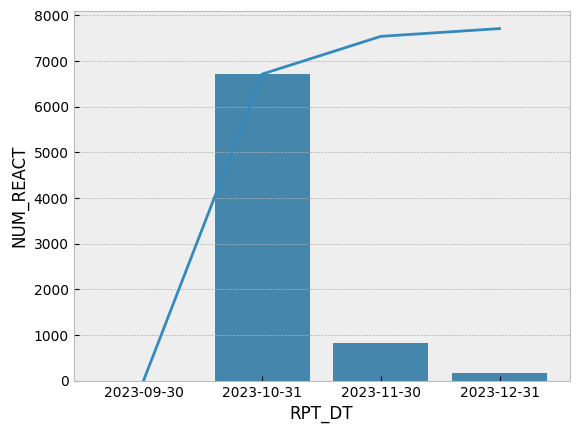

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-09-30,0,10000,NaN,0,0.0000
1,2023-10-31,6710,3290,0.671000,6710,0.6710
2,2023-11-30,826,2464,0.251064,7536,0.7536
3,2023-12-31,170,2294,0.068994,7706,0.7706


50000


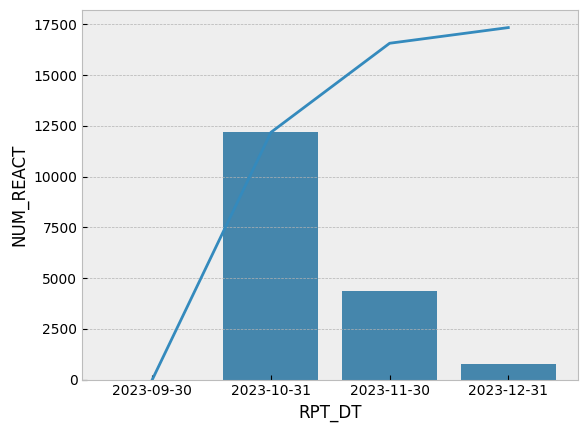

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-09-30,0,50000,NaN,0,0.00000
1,2023-10-31,12181,37819,0.243620,12181,0.24362
2,2023-11-30,4387,33432,0.116000,16568,0.33136
3,2023-12-31,772,32660,0.023092,17340,0.34680


100000


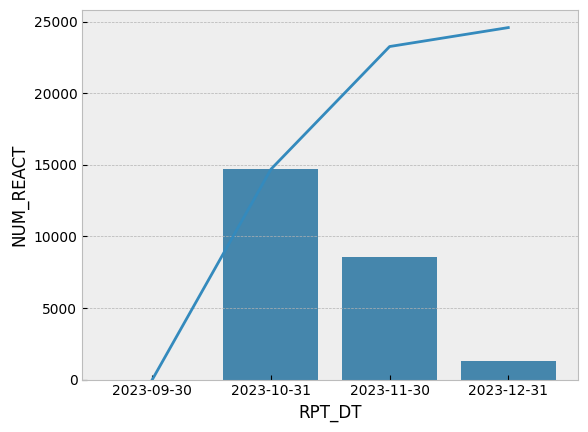

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-09-30,0,100000,NaN,0,0.00000
1,2023-10-31,14692,85308,0.146920,14692,0.14692
2,2023-11-30,8569,76739,0.100448,23261,0.23261
3,2023-12-31,1323,75416,0.017240,24584,0.24584


200000


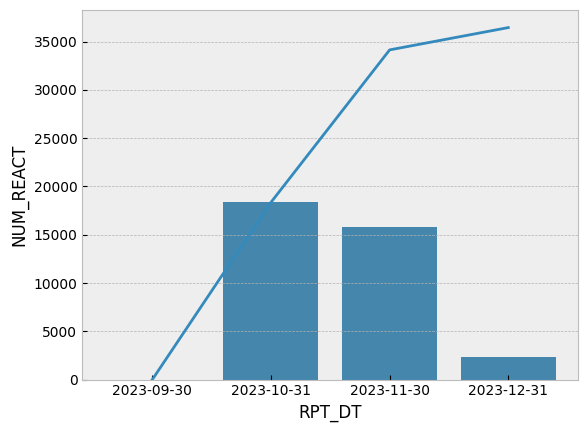

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-09-30,0,200000,NaN,0,0.00000
1,2023-10-31,18356,181644,0.091780,18356,0.09178
2,2023-11-30,15786,165858,0.086906,34142,0.17071
3,2023-12-31,2310,163548,0.013928,36452,0.18226


300000


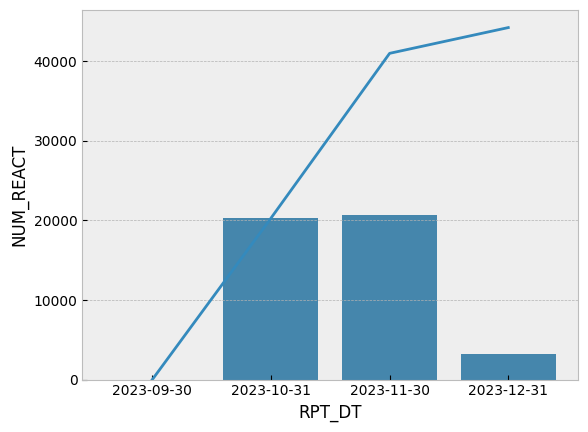

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-09-30,0,300000,NaN,0,0.000000
1,2023-10-31,20286,279714,0.067620,20286,0.067620
2,2023-11-30,20708,259006,0.074033,40994,0.136647
3,2023-12-31,3236,255770,0.012494,44230,0.147433


500000


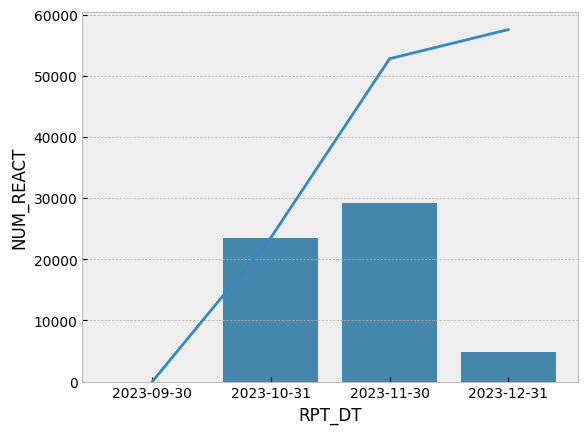

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-09-30,0,500000,NaN,0,0.000000
1,2023-10-31,23568,476432,0.047136,23568,0.047136
2,2023-11-30,29249,447183,0.061392,52817,0.105634
3,2023-12-31,4762,442421,0.010649,57579,0.115158


In [7]:
for limit in [10000, 50000, 100000, 200000, 300000, 500000]:
    print(limit)
    res_df = analyze_cohort(cohort10[:limit])
    display(res_df)